# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [10]:
sinasc_raw.groupby('munResNome')['IDADEMAE'].mean().sort_values(ascending = True).to_frame()

,IDADEMAE
munResNome,
Município ignorado - RO,24.000000
Governador Jorge Teixeira,24.401786
Costa Marques,24.412017
Cujubim,24.482927
Corumbiara,24.716535
Campo Novo de Rondônia,24.825301
Alto Alegre dos Parecis,24.844156
Seringueiras,24.910714
Alto Paraíso,24.960177


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [ ]:
sinasc_raw.info()

In [15]:
# convertendo a coluna 'DTNASC' para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [24]:
# salvando os dados dos bebes que nasceram no dia 05-03 em outra variável
niver = sinasc_raw[sinasc_raw['DTNASC'] == '2019-03-05']
niver.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
550,1,2515504.0,110002,1,25,1.0,12 anos ou mais,223710.0,0.0,0.0,...,4,554,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
608,1,2494299.0,110002,1,21,5.0,8 a 11 anos,999992.0,2.0,0.0,...,5,614,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
626,1,2494299.0,110002,1,24,5.0,8 a 11 anos,421125.0,0.0,0.0,...,5,632,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
1815,1,2496046.0,110004,1,38,1.0,4 a 7 anos,999992.0,5.0,1.0,...,3,1833,ATIVO,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998
1816,1,2496046.0,110004,1,34,2.0,12 anos ou mais,331205.0,4.0,1.0,...,3,1834,ATIVO,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998


In [34]:
# quantidade de bebes que nasceram no meu aniversario
niver.groupby('DTNASC').size().to_frame()

,0
DTNASC,
2019-03-05,80


In [36]:
# Peso médio dos bebes por sexo, por faixa de escoloridade da mãe no dia do meu aniversário

niver.groupby(['DTNASC','SEXO','ESCMAE'])['PESO'].mean().to_frame()

PESO
DTNASC     SEXO      ESCMAE                      
2019-03-05 Feminino  1 a 3 anos       1965.000000
                     12 anos ou mais  3132.916667
                     4 a 7 anos       3464.000000
                     8 a 11 anos      3155.461538
           Masculino 1 a 3 anos       2690.000000
                     12 anos ou mais  3305.000000
                     4 a 7 anos       3286.000000
                     8 a 11 anos      3495.526316

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [38]:
# municipo que nasceram menos bebês em 2019
sinasc_raw.groupby('munResNome')['IDADEMAE'].count().sort_values(ascending = True)

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

***O município em que menos nasceram bebês em 2019 foi Castanheiras***

In [56]:
# idade media, maxima e minima das mães de Castanheiras
sinasc_raw.groupby('munResNome')['IDADEMAE'].agg(['mean', 'max', 'min']).loc['Castanheiras'].to_frame()

,Castanheiras
mean,27.28125
max,39.00000
min,17.00000


In [57]:
# idade media, maxima e minica dos pais de Castanheiras
sinasc_raw.groupby('munResNome')['IDADEPAI'].agg(['mean', 'max', 'min']).loc['Castanheiras'].to_frame()

,Castanheiras
mean,30.392857
max,43.000000
min,17.000000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [60]:
marco = sinasc_raw[(sinasc_raw['DTNASC'] > '2019-03-01') & (sinasc_raw['DTNASC'] < '2019-03-31')]
marco.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
5,1,2516500.0,110001,1,33,5.0,1 a 3 anos,621005.0,2.0,1.0,...,5,6,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
9,1,2679477.0,110001,1,30,2.0,1 a 3 anos,999992.0,1.0,1.0,...,5,10,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
10,1,2679477.0,110001,1,31,5.0,8 a 11 anos,512105.0,1.0,0.0,...,5,11,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [63]:
# Qual o municipio que nasceu mais bebe no mês de março?
marco.groupby('munResNome').size().sort_values(ascending = False)

munResNome
Porto Velho                  695
Ji-Paraná                    174
Vilhena                      143
Cacoal                       130
Ariquemes                    126
Jaru                          74
Guajará-Mirim                 72
Rolim de Moura                66
Ouro Preto do Oeste           65
Pimenta Bueno                 58
Buritis                       56
Nova Mamoré                   51
Espigão D'Oeste               41
Machadinho D'Oeste            40
São Miguel do Guaporé         39
Candeias do Jamari            33
São Francisco do Guaporé      30
Alta Floresta D'Oeste         29
Presidente Médici             28
Costa Marques                 22
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      19
Chupinguaia                   18
Seringueiras                  18
Cujubim                       17
Colorado do Oeste             16
Cerejeiras                    16
Urupá                         14

**Porto velho foi o municipio em que mais naceram bebes em março**

In [65]:
# qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
marco.groupby('munResNome')['QTDFILVIVO'].agg(['mean', 'max', 'min']).loc['Porto Velho'].to_frame()

,Porto Velho
mean,1.314335
max,9.000000
min,0.000000


In [ ]:
# qual a idade media, maxima, minima dos pais nesse municipio?

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [ ]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [ ]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [68]:
sinasc_raw.groupby(['GRAVIDEZ','PARTO'])['IDADEMAE'].size().to_frame()

IDADEMAE
GRAVIDEZ        PARTO            
Dupla           Cesáreo       424
                Vaginal        67
Tríplice e mais Cesáreo         5
Única           Cesáreo     17570
                Vaginal      8855

<Axes: xlabel='PARTO', ylabel='count'>

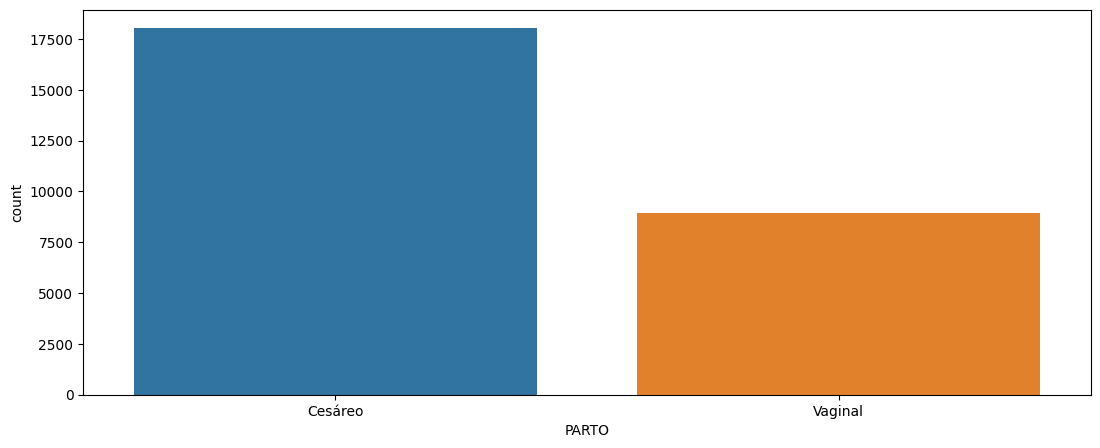

In [72]:
plt.figure(figsize = (13,5))

sns.countplot(sinasc_raw,
              x = 'PARTO')

***Podemos ver que a quantidade de partos cesário foi muito maior que parto vaginal que isso independe do tipo da gravidez***

In [89]:
sinasc_raw.groupby(['APGAR5'])['IDADEMAE'].mean().sort_values(ascending = False).to_frame()

,IDADEMAE
APGAR5,
4.0,29.217391
2.0,27.333333
5.0,26.622222
10.0,26.433218
8.0,26.230692
1.0,26.208333
7.0,26.128631
9.0,25.905014
6.0,25.341772


***Vemos também que o indice apgar, nessa situação, não parece ter relação com a idade da mãe***